c:\Users\rafacampa9\.virtualenvs\cnn_images-dV_bnba4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/200


c:\Users\rafacampa9\.virtualenvs\cnn_images-dV_bnba4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.3375 - loss: 1.9725 - val_accuracy: 0.5355 - val_loss: 1.3468 - learning_rate: 0.0010
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.5671 - loss: 1.2973 - val_accuracy: 0.6462 - val_loss: 1.1048 - learning_rate: 0.0010
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6463 - loss: 1.0912 - val_accuracy: 0.6877 - val_loss: 0.9787 - learning_rate: 0.0010
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6755 - loss: 1.0220 - val_accuracy: 0.7002 - val_loss: 0.9697 - learning_rate: 0.0010
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7026 - loss: 0.9566 - val_accuracy: 0.7115 - val_loss: 0.9369 - learning_rate: 0.0010
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7207 - loss: 0.9080 - val_accuracy: 0.7187 - val_loss: 0.9558 - learning_rate: 0.0010
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0

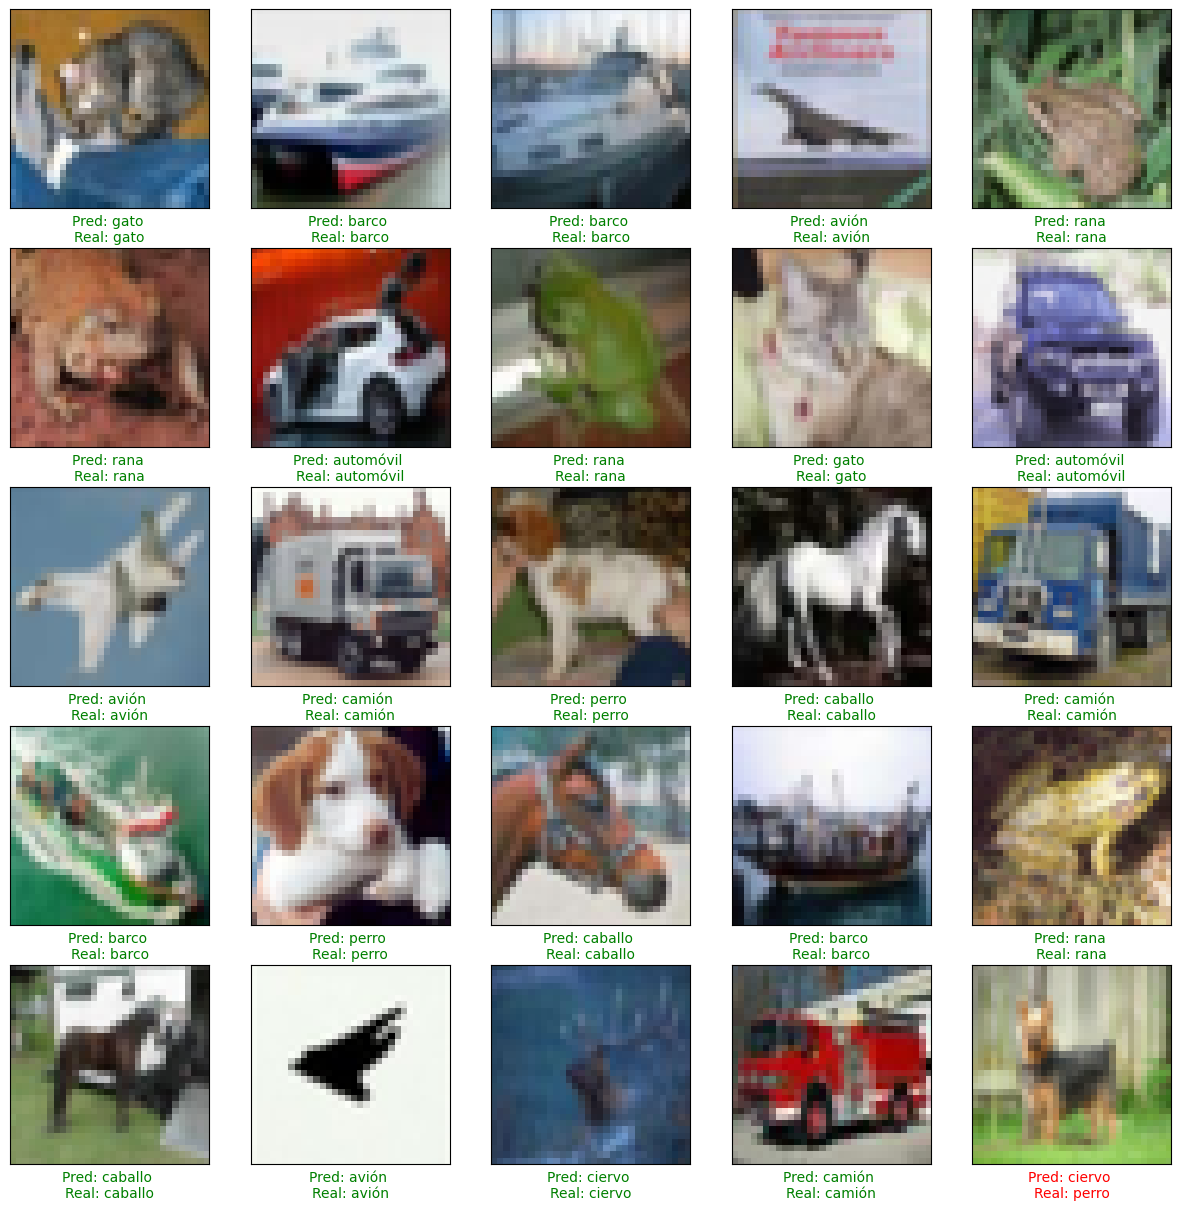

In [2]:
#from tensorflow import
from tensorflow.keras import datasets, models, losses
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from matplotlib.pyplot import (subplot, xticks, yticks, cm, imshow as pltImshow,
                               show as pltShow, figure, grid, xlabel)
from numpy import argmax as npArgmax
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.math import exp as tfExp



def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tfExp(-0.1))
lr_scheduler = LearningRateScheduler(scheduler)


early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# Cargar y dividir el dataset CIFAR-10
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    Conv2D(32,
          (3, 3),
           activation='relu',
           input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax', kernel_regularizer=L2(0.001))
])

# Compilar el modelo
#optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam',#optimizer,
              loss=losses.SparseCategoricalCrossentropy(
                  from_logits=False),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images,
          train_labels,
          epochs=200,
          validation_data=(test_images, test_labels),
          callbacks=[early_stopping, lr_scheduler])

# Evaluar la precisión del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Exactitud del modelo: {test_acc:.2f}')
print(f'Pérdida del modelo: {test_loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Clases posibles en CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Mostrar imágenes con etiquetas predichas y reales
figure(figsize=(15, 15))
for i in range(25):
    subplot(5, 5, i + 1)
    xticks([])
    yticks([])
    grid(False)
    pltImshow(test_images[i], cmap=cm.binary)

    # Calcular la etiqueta predicha y la etiqueta real
    predicted_label = npArgmax(predictions[i])
    true_label = test_labels[i][0]

    # Mostrar la etiqueta predicha y la etiqueta real
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    xlabel("Pred: {} \nReal: {}".format(class_names[predicted_label],
                                            class_names[true_label]), color=color)

pltShow()
